# Customer Churn Prediction
# Author: Wenkang Wei
## Goal
The goals of this project are following:
1. visualize and identify the factors/features
that contributes to the churn of customers
2. Construct and train a machine learning model to predict the 
possibility of churns and help custumer service target the factors
that may lead to churn and prevent customer churn, reduce loss of profit
## Dataset
The dataset is from [kaggle](https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers)
There are 14 attributes in the dataset. The information of the dataset is shown as follow:
+ **RowNumber** — the record (row) number and has no effect on the output.
+ CustomerId — contains random values and has no effect on customer leaving the bank.
+ **Surname** — the surname of a customer has no impact on their decision to leave the bank.
+ **CreditScore** — can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
Geography — a customer’s location can affect their decision to leave the bank. 
+ **Gender** — it’s interesting to explore whether gender plays a role in a customer leaving the bank. We’ll include this column, too.
+ **Age** — this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
+ **Tenure** — refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
+ **Balance** — also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
+ **NumOfProducts** — refers to the number of products that a customer has purchased through the bank.
+ **HasCrCard** — denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank. (0=No,1=Yes)
+ **IsActiveMember** — active customers are less likely to leave the bank, so we’ll keep this. (0=No,1=Yes)
+ **EstimatedSalary** — as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
+ **Exited** — whether or not the customer left the bank. This is what we have to predict. (0=No,1=Yes)

## **Outline of the data analysis process:**
### 1. Data exploration and Visualization
In this step, we are going to load the data from google drive (if you have downloaded the data from kaggle to your google drive). Then we will visualize and analyze the dataset to see each attribute and there relationship
### 2. Data Preprocessing
In this sectoin, we are to do following steps:
+ Clean the data as there may be many missing data like NuLL and NaN, 
+ Convert descriptive data (like text data) into numerical representation so that we can use them to train machine learning models
+ Transform data into suitable forms. For example, in categorical data, we need to convert each class of data into one_hot encoding format so that each class is weighted equally and help improve performance of machine learning model.**Some transformations are following:**
  - one_hot encoding
  - label encoding
  - Normalization/Scaling of data

+ Split dataset into test set and training set

### 3. Model Selection and Evaluation
This section is to 
+ Choose different machine learning models, like logistic regression, decision tree, random forest(decision tree with bagging), SVM classifier. The models could be linear or nonlinear.
+ Then we will train, tune models using GridSearch method
+ Evaluate models using Cross-validation method and Analyze performance using **ROC curve (receiver operation characteristic curve) and AUC (Area under curve)**

### 4. Improvement on Model Performance using feature selection
  The section is to improve the performance of models in Section 3 by using feature selection method to choose and excludes some features.

  Note that during Section 3, training models, some features may be already selected if we use L1 regularization in the loss function.

## 1. Load, Visualize and understand the dataset
There are several things we need to analyze:

+ Determine the target feature and the labels in target
+ Analyze the correlation between target and discrete/continuous features
+ Analyze the correlation among different features 
+ Determine the number of missing values
+ Analyze and determine the possible outlier data
+ Plan to use what strategies to handle missing values and outliers

In [ ]:
# install pydrive to load data from google drive
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate user to access google drive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# get the shareable link of your file from google drive
# The link should be something like 
# https://drive.google.com/file/d/<the id we should copy >/view?usp=sharing
id = "1-xoA9FoSeHofmvP-zlvR6f7OzYvl5T9G"
# id = "1hToFUitLcAVfQ3OFW18blhSUfSVMYCX5"

file = drive.CreateFile({'id':id}) 
file.GetContentFile('bank_churn') 

In [ ]:
import pandas as pd
# load data file called "bank_churn.csv" 
# This data file and this notebook should be in the same folder
churn_df = pd.read_csv('bank_churn')
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# To check the number of unique classes of each attributes (hence the function is called nunique)
churn_df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64


## **Note 1.1: Select "Exited" attribute as target feature to predict**

Since we want to predict if there is customer churn,
we need to train model to predict if customers exit, Hence we use the attribute "Exited" to be target feature the models need to predict

In [ ]:
# Separate the target and the other features to analyze the features only
y = churn_df['Exited']
# churn_df = churn_df.drop(columns=['Exited'])
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# To see the label of each class and the amount of each class in the target
y.unique()

array([1, 0])

In [ ]:
print("Number of clas 1: ",y.sum(), "Total sampel amount:",len(y))

Number of clas 1:  2037 Total sampel amount: 10000


In [ ]:
# Check number of NaN or NULL
churn_df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Note 1.2: Analyze and Visualize attributes
1. Separate the discrete data and continuous data to analyze them 
2. Discrete Data: use count plot to analyze the amount
3. Contiuous Data: use box plot to analyze the distribution

In [ ]:
discrete_features = ['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember','Tenure']
churn_df[['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember','Tenure']]

,Geography,Gender,NumOfProducts,HasCrCard,IsActiveMember,Tenure
0,France,Female,1,1,1,2
1,Spain,Female,1,0,1,1
2,France,Female,3,1,0,8
3,France,Female,2,0,0,1
4,Spain,Female,1,1,1,2
...,...,...,...,...,...,...
9995,France,Male,2,1,0,5
9996,France,Male,1,1,1,10
9997,France,Female,1,0,1,7
9998,Germany,Male,2,1,0,3


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Note 1.1.1:** Analyze the relationship between target "Exited" and other Numerical features

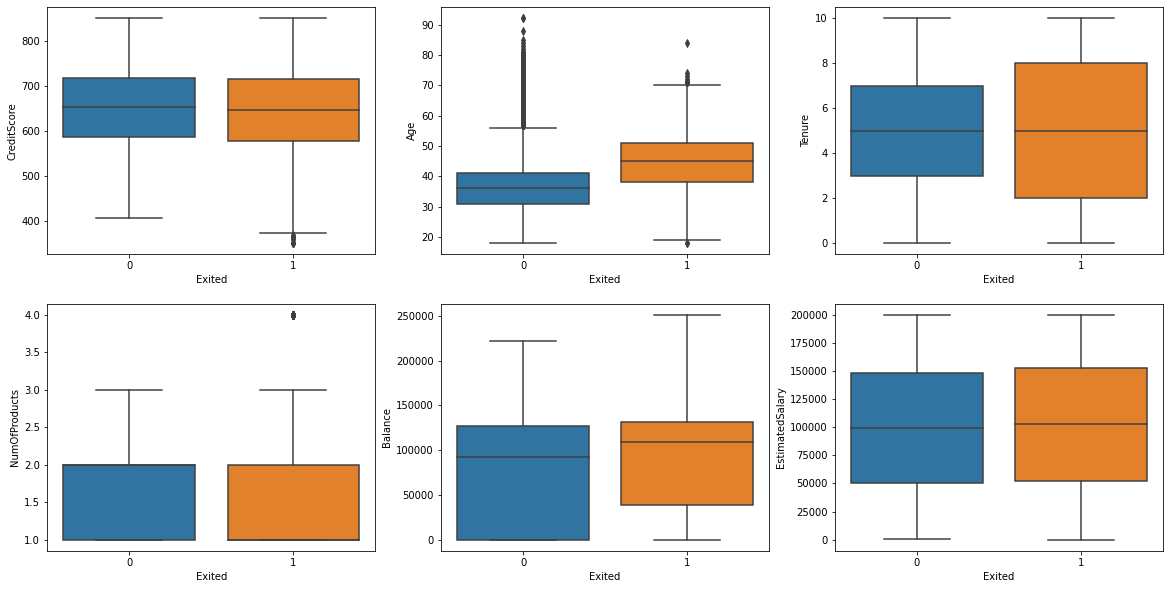

In [ ]:
# boxplot for numerical feature
_,axss = plt.subplots(2,3, figsize=[20,10])
sns.boxplot(x='Exited', y ='CreditScore', data=churn_df, ax=axss[0][0])
sns.boxplot(x='Exited', y ='Age', data=churn_df, ax=axss[0][1])
sns.boxplot(x='Exited', y ='Tenure', data=churn_df, ax=axss[0][2])
sns.boxplot(x='Exited', y ='NumOfProducts', data=churn_df, ax=axss[1][0])
sns.boxplot(x='Exited', y ='Balance', data=churn_df, ax=axss[1][1])
sns.boxplot(x='Exited', y ='EstimatedSalary', data=churn_df, ax=axss[1][2])

**Note 1.1.2:** Analyze correlation among "Exited" and other Categorical Features

Note that:
1. In sns.countplot(), y is always the count of each class of x feature and **hue** is the z-axis data which must be a categorical features. Then the plot 
show the count of intersection of x and hue. So count plot is usually good to visualize categorical data

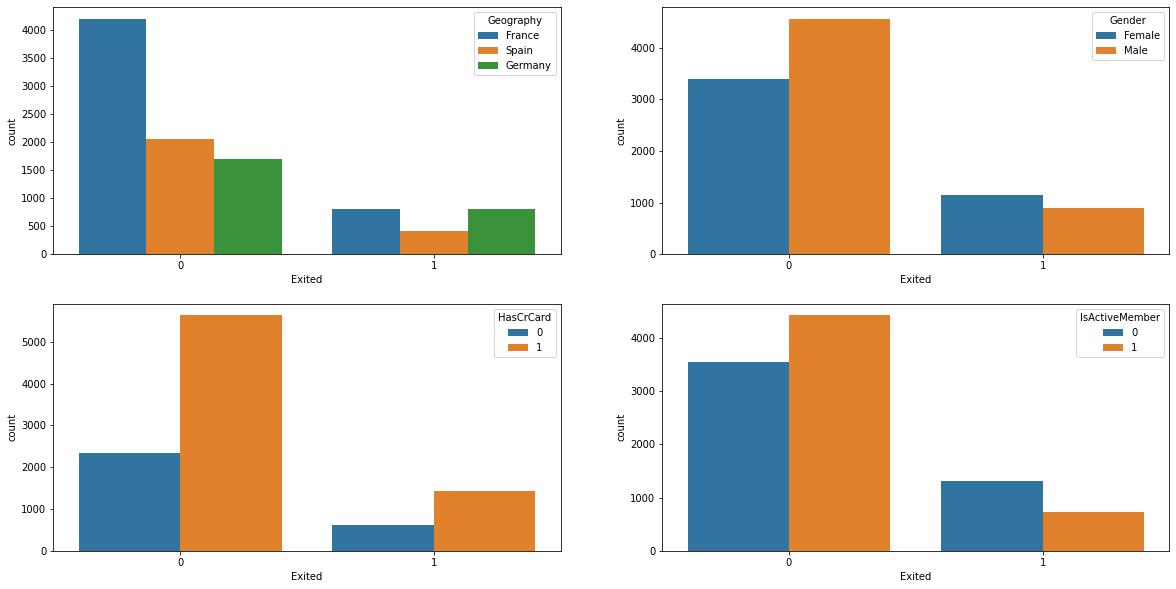

In [ ]:
# understand categorical feature
# 'Geography', 'Gender'
# 'HasCrCard', 'IsActiveMember'
_,axss = plt.subplots(2,2, figsize=[20,10])
sns.countplot(x='Exited', hue='Geography', data=churn_df, ax=axss[0][0])
sns.countplot(x='Exited', hue='Gender', data=churn_df, ax=axss[0][1])
sns.countplot(x='Exited', hue='HasCrCard', data=churn_df, ax=axss[1][0])
sns.countplot(x='Exited', hue='IsActiveMember', data=churn_df, ax=axss[1][1])

Note 1.2: Analyze Correlation between continuous data using Heatmap plot

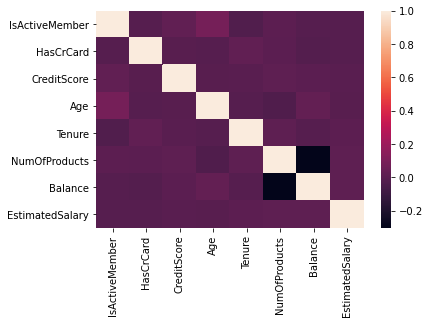

In [ ]:
correlation = churn_df[['IsActiveMember','HasCrCard','CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].corr()
sns.heatmap(correlation)

In [ ]:
correlation

,IsActiveMember,HasCrCard,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
IsActiveMember,1.000000,-0.011866,0.025651,0.085472,-0.028362,0.009612,-0.010084,-0.011421
HasCrCard,-0.011866,1.000000,-0.005458,-0.011721,0.022583,0.003183,-0.014858,-0.009933
CreditScore,0.025651,-0.005458,1.000000,-0.003965,0.000842,0.012238,0.006268,-0.001384
Age,0.085472,-0.011721,-0.003965,1.000000,-0.009997,-0.030680,0.028308,-0.007201
Tenure,-0.028362,0.022583,0.000842,-0.009997,1.000000,0.013444,-0.012254,0.007784
NumOfProducts,0.009612,0.003183,0.012238,-0.030680,0.013444,1.000000,-0.304180,0.014204
Balance,-0.010084,-0.014858,0.006268,0.028308,-0.012254,-0.304180,1.000000,0.012797
EstimatedSalary,-0.011421,-0.009933,-0.001384,-0.007201,0.007784,0.014204,0.012797,1.000000


Note 1.2.2: Analyze correlation between features
From the visualization above, we can know that

# 2. Data Preprocessing
1. **Missing Values:** 
  From part 1, we know that there are no missing values in the dataset, so we don't need to fill NaN value with other valid value 

2. **One-hot encoding:** 
  
  in order to train the model, we need to use one-hot encoding to convert the categorical data who doesn't have order information(just like gender: male and female, they don't have order) into a 0,1 vector and allow model to learn from numerical data

3. **Label encoding:** 
  
  For the data that contain order information, like "one", "two","three" and the order informatoin matters, we need to convert the text data into numerical labels like 1,2,3. The value of the number matters. (The number can affect the weight update during training model using gradient descent)However, this dataset doesn't contain such kind of data, so we just skip it.

4. **Split training set and test set using stratification method:**  
  
  In this step, I use stratification method to split the dataset into training set and test set, such that the distribution/ratio of each class data in training set, test set are as same as original dataset. This method can guarantee the training set and test set contains all classes of data and each class of data must be trained by model.

5. **Normalize data to boost the training:**

  Since different types of numeric data have different range of values and this can affect the learning speed (For example, in gradient descent, weight update depends on the feature value. when the range of value is very large, some update of weight changes a lot. Otherwise, some weight changes slightly. This affects the convergence speed of weight and model)

6. **Note:**

  In Normalization, we should fit the training data only and then transformboth training data and test data. Because when fitting on the test data, the information of test data, like the range of value, will leak to normalized training data. We should not use test data to fit anything. 


In [ ]:
drop_list = ['RowNumber','CustomerId','Surname','Exited']
X= churn_df.drop(columns=drop_list)

### **Note 2.1:**
Use one-hot encoder to convert descriptive labels to numerical labels

In [ ]:
# Convert Gender label to 0,1 labels
# X['Gender'] = X['Gender']=='Female'
# X['Gender'] = X['Gender']=='Male'

## X['Gender'] select the column of 'Gender',  
## .loc[X['Gender']=='Female']=0 : locate the rows that satisfy the condition in the column 'Gender'
## and then replace values in column 'Gender' only
X['Gender'].loc[X['Gender']=='Female'] = 0
X['Gender'].loc[X['Gender']=='Male'] = 1

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [ ]:
X.head()
# X.groupby('Gender').max()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10


In [ ]:
one_hot_features = ['Geography']
X=pd.get_dummies(X,columns=one_hot_features)

In [ ]:
# Split dataset into training set and testset 
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, cross_validate, StratifiedShuffleSplit
# Using stratification method to stratify the dataset based on classes in target feature y
# and then split test set, training set. Finally, shuffle two datasets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, stratify = y, random_state=1)

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 7500 observation with 12 features
test data has 2500 observation with 12 features


### **Note 2.2:**
Normalize/Scale the data 

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## If using Min-Max scaler
# sm = MinMaxScaler()
# X_train = sm.fit_transform(X_train,max=1.0,min=0.0)
# X_test = ss.transform(X_test)

In [ ]:
X_train[:5]

array([[-0.17298471,  0.91333963,  0.28920217,  1.7311989 , -1.21891593,
        -0.91276854, -1.5421992 ,  0.968496  , -0.35204406, -0.99973337,
        -0.57755555,  1.73205081],
       [ 0.60240695, -1.09488296, -1.50931877, -0.3411556 , -0.07697728,
        -0.91276854,  0.64842466, -1.03252879,  0.07231455, -0.99973337,
         1.73143519, -0.57735027],
       [-1.05176192, -1.09488296, -0.18409282,  1.38580648, -1.21891593,
         0.79610915, -1.5421992 , -1.03252879, -0.02671055,  1.0002667 ,
        -0.57755555, -0.57735027],
       [-0.04892204, -1.09488296,  0.85715615,  0.69502165,  0.2296249 ,
        -0.91276854,  0.64842466,  0.968496  ,  0.86622125,  1.0002667 ,
        -0.57755555, -0.57735027],
       [ 0.81951661, -1.09488296,  0.57317916,  0.69502165,  0.23727778,
         0.79610915,  0.64842466, -1.03252879, -0.49661695, -0.99973337,
        -0.57755555,  1.73205081]])

# 3. Model Selecction and Evaluation
1. Models to try:
  + Logistic Regression
  + Decision Tree
  + Random Forest
  + KNN
2. Model Evaluation
  + Cross-Validation to assess models / estimate Model performance
  + ROC curve (Receiver Operating Characteristic Curve)
  + AUC (Area under curve)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import StratifiedKFold, cross_val_score

rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier()
svc_clf = SVC()
model_ls = [rf_clf, lr_clf, knn_clf,svc_clf]
model_names = ['Random Forest','logistic Reg', 'KNN','SVC']

### Note 3.1:
Train and evaluate the models using Cross-Validatoin

In [ ]:
for i in range(len(model_ls)):
  score = cross_val_score(model_ls[i], X_train, y_train, cv=5)
  print("Model: ",model_names[i], "Score: ", score)

Model:  Random Forest Score:  [0.87533333 0.87       0.854      0.85866667 0.86466667]
Model:  logistic Reg Score:  [0.81933333 0.80666667 0.80666667 0.80933333 0.82      ]
Model:  KNN Score:  [0.82533333 0.836      0.814      0.824      0.832     ]
Model:  SVC Score:  [0.87133333 0.85066667 0.846      0.84733333 0.856     ]


### Note 3.2: Tune the parameters to get better score
Tune the models using GridSearch to improve preformance and evaluate the models

In [ ]:
# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(0.001, 0.01, 1, 5, 10)
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=5)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': (0.001, 0.01, 1, 5, 10), 'penalty': ('l1', 'l2')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print_grid_search_metrics(Grid_LR)
best_LR_model = Grid_LR.best_estimator_

Best score: 0.8124
Best parameters set:
C:1
penalty:l2


In [ ]:
# Tune KNN model
parameters = {
    'n_neighbors':[1,3,5,7,9,12,15,20]
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 12, 15, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print_grid_search_metrics(Grid_KNN)
best_KNN_model = Grid_KNN.best_estimator_

Best score: 0.8329333333333333
Best parameters set:
n_neighbors:15


In [ ]:
parameters = {
    'n_estimators' : [40,60,80,100,120,150]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
print_grid_search_metrics(Grid_RF)
best_RF_model = Grid_RF.best_estimator_

Best score: 0.8669333333333334
Best parameters set:
n_estimators:100


In [ ]:
# SVC
parameters = {
    'C' : [0.001,0.01, 1, 3 ,5],
    'kernel':['rbf','poly'],
    'degree': [2,3,4],  # degree of the polynominal kernel
    "probability":[True]
}
Grid_SVC = GridSearchCV(SVC(),parameters, cv=5)
Grid_SVC.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 1, 3, 5], 'degree': [2, 3, 4],
                         'kernel': ['rbf', 'poly'], 'probability': [True]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print_grid_search_metrics(Grid_SVC)
best_SVC_model = Grid_SVC.best_estimator_

Best score: 0.8585333333333333
Best parameters set:
C:3
degree:2
kernel:rbf
probability:True


### Note 3.2: Evaluate all models using cross-validation and ROC,AUC

In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, classification_report
model_names = ['logistic Reg','KNN','Random Forest','SVC']
confusion_matrices =[]
matrices = [ confusion_matrix(y_test,best_LR_model.predict(X_test)),
 confusion_matrix(y_test,best_KNN_model.predict(X_test)),
 confusion_matrix(y_test,best_RF_model.predict(X_test)),
 confusion_matrix(y_test,best_SVC_model.predict(X_test))]

for i in range(len(matrices)):
  confusion_matrices.append((model_names[i], matrices[i]))



confusion_matrices

[('logistic Reg', array([[1921,   70],
         [ 410,   99]])), ('KNN', array([[1920,   71],
         [ 352,  157]])), ('Random Forest', array([[1926,   65],
         [ 285,  224]])), ('SVC', array([[1930,   61],
         [ 296,  213]]))]

In [ ]:
# Compute and print accuracy, precision, recall
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))
    print ()


def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)

draw_confusion_matrices(confusion_matrices)

logistic Reg
Accuracy is: 0.808
precision is: 0.5857988165680473
recall is: 0.1944990176817289

KNN
Accuracy is: 0.8308
precision is: 0.6885964912280702
recall is: 0.30844793713163066

Random Forest
Accuracy is: 0.86
precision is: 0.7750865051903114
recall is: 0.4400785854616896

SVC
Accuracy is: 0.8572
precision is: 0.7773722627737226
recall is: 0.41846758349705304



### Note 3.3: 
Test and Evaluate the models using ROC, AUC

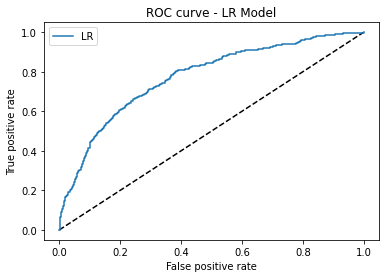

AUC of LR 0.7722314264879581


In [ ]:
from sklearn.metrics import roc_curve, plot_roc_curve, auc
def plot_roc(fpr,tpr, threshold, model):
  plt.figure(1)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr, tpr, label=model)
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve - {0} Model'.format(model))
  plt.legend(loc='best')
  plt.show()
## We can either use plot roc function from sklearn or the self-defined function
#plot_roc_curve(best_LR_model,X_test, y_test,)

fpr_LR, tpr_LR, threshold = roc_curve(y_test, best_LR_model.predict_proba(X_test)[:,1])
## Using self-define ROC Curve plot function
plot_roc(fpr_LR, tpr_LR, threshold, 'LR')
print("AUC of LR",auc(fpr_LR,tpr_LR))

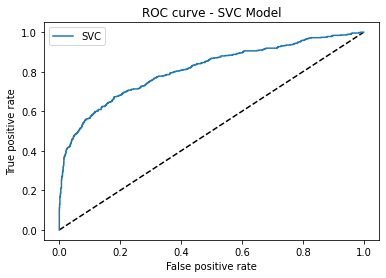

AUC of SVC 0.8101461488288655


In [ ]:

fpr_SVC, tpr_SVC, threshold_SVC = roc_curve(y_test, best_SVC_model.predict_proba(X_test)[:,1])
## Using self-define ROC Curve plot function
plot_roc(fpr_SVC, tpr_SVC, threshold_SVC, 'SVC')
print("AUC of SVC",auc(fpr_SVC,tpr_SVC))

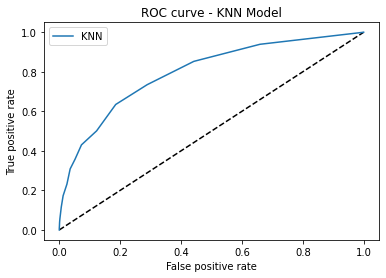

AUC of KNN 0.7966078196678767


In [ ]:
fpr_KNN, tpr_KNN, threshold_KNN = roc_curve(y_test, best_KNN_model.predict_proba(X_test)[:,1])
## Using self-define ROC Curve plot function
plot_roc(fpr_KNN, tpr_KNN, threshold_KNN, 'KNN')
print("AUC of KNN",auc(fpr_KNN,tpr_KNN))

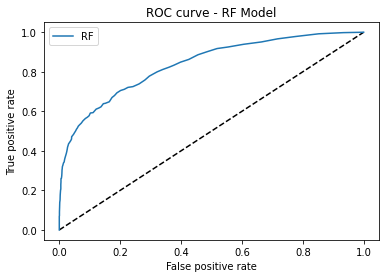

AUC of RF 0.8368799085077346


In [ ]:
fpr_RF, tpr_RF, threshold_RF = roc_curve(y_test, best_RF_model.predict_proba(X_test)[:,1])
## Using self-define ROC Curve plot function
plot_roc(fpr_RF, tpr_RF, threshold_RF, 'RF')
print("AUC of RF",auc(fpr_RF,tpr_RF))

In [ ]:
# Compute and print accuracy, precision, recall

    
def draw_performance_tb(confusion_matrix_ls):
    def cal_evaluation(classifier, cm):
      tn = cm[0][0]
      fp = cm[0][1]
      fn = cm[1][0]
      tp = cm[1][1]
      accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
      precision = tp / (tp + fp + 0.0)
      recall = tp / (tp + fn + 0.0)
      return accuracy, precision, recall

    class_names = ['Not','Churn']
    model_dic = {}
    eval_df = pd.DataFrame(columns=['model','Accuracy','Precision','Recall'])
    for cm in confusion_matrix_ls:
        classifier, cm = cm[0], cm[1]
        accuracy, precision, recall = cal_evaluation(classifier, cm)
        model_df = pd.DataFrame(data={'model':classifier,'Accuracy':accuracy,'Precision':precision,'Recall':recall},index=[0])
        # print(model_df)
        eval_df=eval_df.append(model_df ,ignore_index= True) 
        
    return eval_df

draw_performance_tb(confusion_matrices)

,model,Accuracy,Precision,Recall
0,logistic Reg,0.8080,0.585799,0.194499
1,KNN,0.8308,0.688596,0.308448
2,Random Forest,0.8600,0.775087,0.440079
3,SVC,0.8572,0.777372,0.418468


# 4. Improvement on the model by using feature selection
1. Let check the feature importance computed from RandomForest and the weights of logistic regression, which can tells us how significant each features are.
2. Then I use K-mean clustering to find the cluster centroids ann predict each sample belongs to which cluster, which features samples are similar. This prediction can be used as new feature to let models learn more about the feature.

In [ ]:
forest = best_RF_model
# forest.fit(X, y)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
Age : 0.2405
EstimatedSalary : 0.146
CreditScore : 0.1431
Balance : 0.1373
NumOfProducts : 0.134
Tenure : 0.0821
IsActiveMember : 0.0348
Geography_Germany : 0.0232
Gender : 0.021
HasCrCard : 0.0187
Geography_France : 0.0101
Geography_Spain : 0.0091


In [ ]:
np.random.seed()
LRmodel_l2 = best_LR_model

LRmodel_l2.coef_[0]

indices = np.argsort(abs(LRmodel_l2.coef_[0]))[::-1]

print ("Logistic Regression (L2) Coefficients")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X.columns[indices[ind]],round(LRmodel_l2.coef_[0][indices[ind]], 4)))

Logistic Regression (L2) Coefficients
Age : 0.7631
IsActiveMember : -0.5169
Gender : -0.2529
Geography_Germany : 0.2371
Balance : 0.1383
Geography_France : -0.1338
Geography_Spain : -0.0826
CreditScore : -0.0636
NumOfProducts : -0.056
Tenure : -0.0371
HasCrCard : -0.0279
EstimatedSalary : 0.0247


In [ ]:

from sklearn.inspection import permutation_importance
## Impute feature importance
 
LR_model = best_LR_model
importances = permutation_importance(LR_model, X, y, n_repeats=10,random_state=0)
importances = importances.importances_mean
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Logistic Regression Model:")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by Logistic Regression Model:
Balance : 0.0004
EstimatedSalary : 0.0002
Gender : 0.0001
Tenure : 0.0001
IsActiveMember : 0.0
Geography_Germany : 0.0
Geography_Spain : 0.0
Geography_France : 0.0
HasCrCard : 0.0
NumOfProducts : 0.0
CreditScore : -0.0
Age : -0.0001


### Note 4.1:
1. Using  K-Mean clustering to find the clusters and allocate data to different clusters to obtain new features.
2. K-Mean Clustering allows us to group the samples that have similar features together and tell models what kinds of data samples are similar to help improve model performances 

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters =12, init='k-means++',random_state=2020).fit(X_train)


In [ ]:
km.cluster_centers_

array([[-1.46026424e-02,  8.32317272e-02, -1.65732884e-01,
        -8.94191134e-03,  7.70800974e-01, -5.40564652e-01,
         6.34493829e-01, -1.03252879e+00,  6.84737659e-02,
         1.00026670e+00, -5.77555549e-01, -5.77350269e-01],
       [-2.59214873e-02, -1.16518105e-01,  8.14663596e-02,
         9.74875569e-02,  6.95386874e-01, -9.57033366e-02,
         6.48424664e-01, -1.03252879e+00,  1.60906815e-02,
        -9.99733369e-01,  1.73143519e+00, -5.77350269e-01],
       [-1.91595362e-02,  1.45887567e-01,  1.17588784e-02,
         2.28438126e-02,  7.04926536e-01, -5.50279330e-01,
         6.48424664e-01,  1.33051305e-01, -2.42317033e-02,
        -9.99733369e-01, -5.77555549e-01,  1.73205081e+00],
       [-2.77337767e-02, -1.23004434e-02, -2.82677067e-01,
         3.94921801e-02, -1.11258705e+00,  5.61717636e-01,
         6.44930846e-01,  9.68495997e-01, -1.91856753e-02,
         1.00026670e+00, -5.77555549e-01, -5.77350269e-01],
       [ 1.51522363e-02, -1.08809589e-01,  2.3566793

In [ ]:
train_clusters = km.predict(X_train)
test_clusters = km.predict(X_test)
train_clusters.shape,test_clusters.shape, X_train.shape, X_test.shape

((7500,), (2500,), (7500, 12), (2500, 12))

In [ ]:
df_clusters = pd.DataFrame(data={'cluster':train_clusters})


In [ ]:
set(df_clusters['cluster'])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}

In [ ]:
# To see if the trained clusters are good clusters that have almost equal amount of data points
for c in set(df_clusters['cluster']):
  print('Center:',c,' Count:',len(df_clusters[df_clusters['cluster'] == c]))

Center: 0  Count: 629
Center: 1  Count: 663
Center: 2  Count: 594
Center: 3  Count: 627
Center: 4  Count: 334
Center: 5  Count: 666
Center: 6  Count: 647
Center: 7  Count: 873
Center: 8  Count: 387
Center: 9  Count: 994
Center: 10  Count: 538
Center: 11  Count: 548


**Note**: Convert numerical labels of centroids of clusters into one-hot binary form since in the labels of cluster centroid, the range of value doesn't matter and each label should be weighted equally

In [ ]:
# One-hot Encoding to convert numerical label to 0,1 binary representation
train_clusters = pd.get_dummies(train_clusters)
test_clusters = pd.get_dummies(test_clusters)

In [ ]:
# train_clusters.reshape([len(train_clusters),1]).shape
X_train_cluster = np.concatenate([X_train, train_clusters], axis=1)
X_test_cluster = np.concatenate([X_test, test_clusters], axis=1)

### **Note 4.2:** Re-train the selected models using new dataset after adding new feature.

In [ ]:
# Random Forest with Cluster feature
parameters = {
    'n_estimators' : [40,60,80,100,120,140]
}
Grid_RF_cluster = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF_cluster.fit(X_train_cluster, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
# ss.inverse_transform(X_train[:10,:])

In [ ]:
print_grid_search_metrics(Grid_RF_cluster)
best_RF_cluster_model = Grid_RF_cluster.best_estimator_

Best score: 0.8621333333333334
Best parameters set:
n_estimators:80


In [ ]:
new_matrices = [("RF with Cluster",confusion_matrix(y_test,best_RF_cluster_model.predict(X_test_cluster)))]
from sklearn.metrics import recall_score, precision_score,accuracy_score
print("recall:",recall_score(y_test,best_RF_cluster_model.predict(X_test_cluster)),
'Precisoin:',precision_score(y_test,best_RF_cluster_model.predict(X_test_cluster)),
'Accuracy:',accuracy_score(y_test,best_RF_cluster_model.predict(X_test_cluster)))
# draw_performance_tb(new_matrices)
# new_matrices

recall: 0.4106090373280943 Precisoin: 0.7655677655677655 Accuracy: 0.8544


In [ ]:
# SVC
parameters = {
    'C' : [0.001,1, 3 ,5, 10],
    'kernel':['rbf'],
    # 'degree': [2,3,4],  # degree of the polynominal kernel
    "probability":[True]
}
Grid_SVC_cluster = GridSearchCV(SVC(),parameters, cv=5)
Grid_SVC_cluster.fit(X_train_cluster, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 1, 3, 5, 10], 'kernel': ['rbf'],
                         'probability': [True]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print_grid_search_metrics(Grid_SVC_cluster)
best_SVC_cluster_model = Grid_SVC_cluster.best_estimator_

Best score: 0.8575999999999999
Best parameters set:
C:3
kernel:rbf
probability:True


In [ ]:
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(0.001, 0.01, 1, 5, 10)
}
Grid_LR_cluster = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=5)
Grid_LR_cluster.fit(X_train_cluster, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': (0.001, 0.01, 1, 5, 10), 'penalty': ('l1', 'l2')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print_grid_search_metrics(Grid_LR_cluster)
best_LR_cluster_model = Grid_LR_cluster.best_estimator_

Best score: 0.8186666666666668
Best parameters set:
C:5
penalty:l1


In [ ]:
parameters = {
    'n_neighbors':[1,3,5,7,9,12,15,20]
}
Grid_KNN_cluster = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN_cluster.fit(X_train_cluster, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 12, 15, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print_grid_search_metrics(Grid_KNN_cluster)
best_KNN_cluster_model = Grid_KNN_cluster.best_estimator_

Best score: 0.8310666666666666
Best parameters set:
n_neighbors:15


In [ ]:
model_names = ['logistic Reg with Cluster','KNN with Cluster','Random Forest with Cluster','SVC with Cluster']
confusion_matrices_cluster =[]
matrices_cluster = [ confusion_matrix(y_test,best_LR_cluster_model.predict(X_test_cluster)),
 confusion_matrix(y_test,best_KNN_cluster_model.predict(X_test_cluster)),
 confusion_matrix(y_test,best_RF_cluster_model.predict(X_test_cluster)),
 confusion_matrix(y_test,best_SVC_cluster_model.predict(X_test_cluster))]

for i in range(len(matrices_cluster)):
  confusion_matrices_cluster.append((model_names[i], matrices_cluster[i]))


In [ ]:
model_names = ['logistic Reg with Cluster','KNN with Cluster','Random Forest with Cluster','SVC with Cluster']
model_ls = [best_LR_cluster_model,best_KNN_cluster_model,best_RF_cluster_model,best_SVC_cluster_model]
for i, model in enumerate(model_ls):
  print(model_names[i],': ',
      "recall:",recall_score(y_test,model.predict(X_test_cluster)),'\t',
  'Precisoin:',precision_score(y_test,model.predict(X_test_cluster)),'\t',
  'Accuracy:',accuracy_score(y_test,model.predict(X_test_cluster)))

logistic Reg with Cluster :  recall: 0.2357563850687623 	 Precisoin: 0.6629834254143646 	 Accuracy: 0.82
KNN with Cluster :  recall: 0.29469548133595286 	 Precisoin: 0.6976744186046512 	 Accuracy: 0.8304
Random Forest with Cluster :  recall: 0.4106090373280943 	 Precisoin: 0.7655677655677655 	 Accuracy: 0.8544
SVC with Cluster :  recall: 0.4263261296660118 	 Precisoin: 0.7805755395683454 	 Accuracy: 0.8588


In [ ]:
model_names = ['logistic Reg','KNN','Random Forest','SVC']
model_ls = [best_LR_model,best_KNN_model,best_RF_model,best_SVC_model]
for i, model in enumerate(model_ls):
  print(model_names[i],': ',
      "recall:",recall_score(y_test,model.predict(X_test)),'\t',
  'Precisoin:',precision_score(y_test,model.predict(X_test)),'\t',
  'Accuracy:',accuracy_score(y_test,model.predict(X_test)))

logistic Reg :  recall: 0.1944990176817289 	 Precisoin: 0.5857988165680473 	 Accuracy: 0.808
KNN :  recall: 0.30844793713163066 	 Precisoin: 0.6885964912280702 	 Accuracy: 0.8308
Random Forest :  recall: 0.4400785854616896 	 Precisoin: 0.7750865051903114 	 Accuracy: 0.86
SVC :  recall: 0.41846758349705304 	 Precisoin: 0.7773722627737226 	 Accuracy: 0.8572


In [ ]:
draw_performance_tb(confusion_matrices_cluster)

,model,Accuracy,Precision,Recall
0,logistic Reg with Cluster,0.8200,0.662983,0.235756
1,KNN with Cluster,0.8304,0.697674,0.294695
2,Random Forest with Cluster,0.8544,0.765568,0.410609
3,SVC with Cluster,0.8588,0.780576,0.426326


In [ ]:
draw_performance_tb(confusion_matrices)

,model,Accuracy,Precision,Recall
0,logistic Reg,0.8080,0.585799,0.194499
1,KNN,0.8308,0.688596,0.308448
2,Random Forest,0.8600,0.775087,0.440079
3,SVC,0.8572,0.777372,0.418468


### Summary:
We can see that after adding the feature of k-mean cluster, all performances of Logistic Regression are improved,where accuracy is improved by 2%. Performances of SVC classifier are also improved slightly. In KNN, there is tradeoff between precision and recall. Accuracy, Recall and Precision of Random Forest are decreased slightly.

In these models, SVC and Random Forest are suggested to solve this Customer Churn Prediction problem. In addition, we can also try neural network method to see if it works for this problem.

In [ ]:
X_train_cluster[0].shape

(24,)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling1D, Conv1D, InputLayer, Dropout, Flatten
data_shape = (X_train_cluster.shape[1],)
def NN_model(input_shape):
  nn_model = Sequential()
  nn_model.add(Conv1D(1,strides=1,kernel_size=3, padding='same',input_shape=input_shape))
  nn_model.add(Dense(24,activation='relu'))
  nn_model.add(Dropout(0.3))

  
  # nn_model.add(Dense(6, ))
  # nn_model.add(Dropout(0.3))
  # nn_model.add(GlobalAveragePooling1D())
  model.add(Flatten())
  nn_model.add(Dense(1, activation='softmax'))
  
  return nn_model
nn_model = NN_model(data_shape)
nn_model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
print(nn_model.summary())
nn_model.fit(X_train_cluster,y_train, epochs=5,batch_size=10)


ValueError: ignored